In [1]:
!pip install pandas numpy matplotlib folium lime tensorflow keras


In [2]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/salinipradhan/Desktop/uber-raw-data-jun14.csv")

# Display the first few rows
print(data.head())

# Basic data exploration
print(data.info())


          Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512
3  6/1/2014 0:04:00  40.7555 -73.9833  B02512
4  6/1/2014 0:07:00  40.6880 -74.1831  B02512
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  663844 non-null  object 
 1   Lat        663844 non-null  float64
 2   Lon        663844 non-null  float64
 3   Base       663844 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.3+ MB
None


In [4]:
import folium
from folium.plugins import HeatMap

# Convert 'Date/Time' to datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Filter data to peak hours (e.g., 8 AM to 10 AM)
filtered_data = data[(data['Date/Time'].dt.hour >= 8) & (data['Date/Time'].dt.hour <= 10)]

# Initialize map centered on NYC
map_ = folium.Map(location=[40.75, -73.99], zoom_start=11)

# Add heatmap
heat_data = [[row['Lat'], row['Lon']] for index, row in filtered_data.iterrows()]
HeatMap(heat_data).add_to(map_)

# Save the map to an HTML file and view
map_.save("uber_heatmap.html")
print("Heatmap saved as 'uber_heatmap.html'")


Heatmap saved as 'uber_heatmap.html'


In [5]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show selenium


Name: selenium
Version: 4.27.1
Summary: Official Python bindings for Selenium WebDriver
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: certifi, trio, trio-websocket, typing_extensions, urllib3, websocket-client
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
from selenium import webdriver

# Define the local file path for the HTML file
file_path = "/Users/salinipradhan/uber_heatmap.html"

# Convert the local file path to a file URL
file_url = "file://" + os.path.abspath(file_path)

# Configure Selenium WebDriver (ensure ChromeDriver is installed)
driver = webdriver.Chrome()  # Update path if necessary

# Open the local HTML file in the browser using the file URL
driver.get(file_url)

# Optionally, take a screenshot of the heatmap
driver.save_screenshot("/Users/salinipradhan/Downloads/heatmap.png")

# Quit the driver
driver.quit()


In [8]:

!pip install intel-tensorflow




In [10]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Load pre-trained VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a custom model
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes: Low, Medium, High demand
])

# Freeze the base model layers
vgg_base.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Simulated dataset (replace this with your actual dataset)
# Create a batch of 10 heatmap images for demonstration
x_train = np.random.rand(10, 224, 224, 3)  # 10 images of 224x224x3
y_train = to_categorical(np.random.randint(3, size=10), num_classes=3)  # Random labels for 3 classes

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Example of processing a single image
heatmap_image = Image.open('/Users/salinipradhan/Downloads/heatmap.png')
heatmap_image = heatmap_image.resize((224, 224))
single_image = np.array(heatmap_image).reshape(1, 224, 224, 3) / 255.0

# Predict the class for the single image
predictions = model.predict(single_image)
print("Predictions:", predictions)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3750 - loss: 1.2891 - val_accuracy: 0.0000e+00 - val_loss: 16.0850
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 9.7990 - val_accuracy: 0.0000e+00 - val_loss: 9.7346
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 5.3023 - val_accuracy: 0.0000e+00 - val_loss: 2.5816
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 1.3568 - val_accuracy: 0.0000e+00 - val_loss: 1.0642
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3750 - loss: 1.1518 - val_accuracy: 1.0000 - val_loss: 0.3659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Predictions: [[0.21092628 0.675926   0.11314771]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

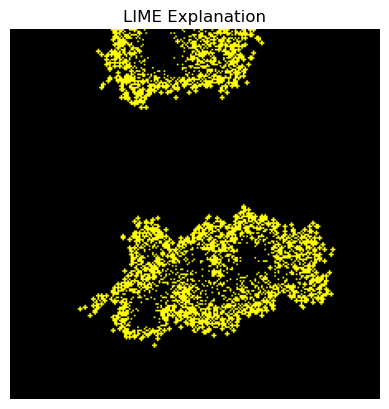

In [11]:
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Define a prediction function
def predict(images):
    return model.predict(images)

# Initialize the LIME explainer
explainer = LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    x_train[0].astype('double'),
    predict,
    top_labels=3,
    hide_color=0,
    num_samples=1000
)

# Get and visualize the explanation
temp, mask = explanation.get_image_and_mask(
    label=1,
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.0
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation")
plt.axis("off")
plt.show()
